# Introduction to Perceptron
## Perceptron Classifier Implementation
Following code from Raschka's book.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import entropy
import random

%matplotlib inline

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [ ]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]


## Questao 1 - Implemente uma função para calcular a acurácia do modelo

In [ ]:
# our code
def accuracy(predicted , correct):
    size = len(predicted)
    return 1 - (np.sum(np.abs((predicted+1)*1/2 - (correct+1)*1/2 ))/size)

accuracy(ppn.predict(X_newdata), y)

0.6666666666666667

## Questao 2 - Implemente um método de validação cruzada para testar 

In [ ]:
accuracy((np.array([1,-1,1,-1,1,1])+1)*1/2,(np.array([-1,-1,1,1,-1,1])+1)*1/2)

#np.abs(np.array([1,-1,1,-1,1,1]) - np.array([-1,-1,1,1,-1,1]))
#(np.array([1,-1,1,-1,1,1])+1)*1/2

0.5

## Teste o classificador usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

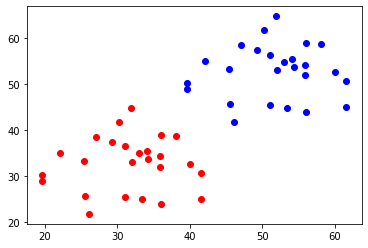

In [ ]:
spdt_one = np.random.normal(30, size=(25,2), scale=5.95)
spdt_two = spdt_one+20
plt.plot(spdt_one[:,0], spdt_one[:,1], 'ro')
plt.plot(spdt_two[:,0], spdt_two[:,1], 'bo')

In [ ]:
# Merging data
spdt_set = np.concatenate((spdt_one, spdt_two), axis=0).astype(int)
spdt_y = np.concatenate( (np.ones(25), np.ones(25)*-1),axis = 0)

# Shuffling and spliting data
paired = list(zip(spdt_set, spdt_y))
np.random.shuffle(paired)

spdt_trainset = paired[:40]
spdt_testset = paired[40:]

spdt_trsX, spdt_trsY = zip(*spdt_trainset)
spdt_tssX, spdt_tssY = zip(*spdt_testset)

#print(type(spdt_trsX),type(spdt_trsY),"\n\n",spdt_tssX,spdt_tssY)

# Train and Evaluate our model
ppn2 = Perceptron(n_iter=100)
ppn2.fit(np.array(spdt_trsX),np.array(spdt_trsY))
accuracy(ppn2.predict(np.array(spdt_tssX)), np.array(spdt_tssY))
#ppn2.predict(np.array(spdt_tssX))

# plot data and line

0.7

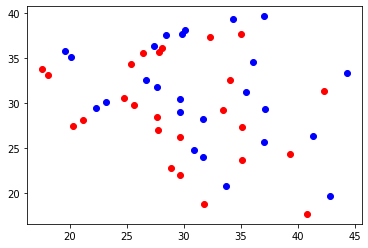

In [ ]:
nsdt_one = np.random.normal(30, size=(25,2), scale=5.95)
nsdt_two = nsdt_one+2

plt.plot(nsdt_one[:,0], nsdt_one[:,1], 'ro')
plt.plot(nsdt_two[:,0], nsdt_two[:,1], 'bo')

In [ ]:
nsdt_set = np.concatenate((nsdt_one, nsdt_two), axis=0).astype(int)
nsdt_y = np.concatenate( (np.ones(25), np.ones(25)*-1),axis = 0)

# Shuffling and spliting data
paired = list(zip(nsdt_set, nsdt_y))
np.random.shuffle(paired)

nsdt_trainset = paired[:40]
nsdt_testset = paired[40:]

nsdt_trsX, nsdt_trsY = zip(*nsdt_trainset)
nsdt_tssX, nsdt_tssY = zip(*nsdt_testset)

# Train and Evaluate our model
ppn3 = Perceptron(n_iter=100)
ppn3.fit(np.array(nsdt_trsX),np.array(nsdt_trsY))
accuracy(ppn3.predict(np.array(nsdt_tssX)), np.array(nsdt_tssY))

0.5

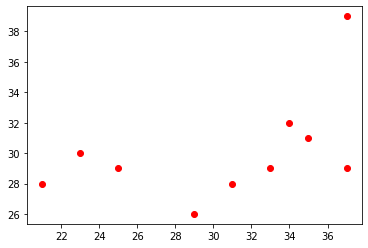

In [ ]:
plt.plot(np.array(nsdt_tssX)[:,0], np.array(nsdt_tssX)[:,1], 'ro')
#plt.plot(ppn3.w_, 'bo')

## Questao 3 - Treine um classificador perceptron para os dados de seu estudo de caso

# Classificar ataques por conteúdo da mensagem

# Teste de conjunto linearmente separável
Testando se o conjunto é linearmente separváel baseado no conteúdo de uma mensagem

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
path_first = '/content/drive/My Drive/DataNotebook/UFPI_NCAD_IoT_Attacks/data_raw/splits/first_dataset.csv'
first_dataset = pd.read_csv(path_first)
path_second = '/content/drive/My Drive/DataNotebook/UFPI_NCAD_IoT_Attacks/data_raw/splits/second_dataset.csv'
second_dataset = pd.read_csv(path_second)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,17,18,19,20,21,22,23,25,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,12,15,16,18,19,20,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
second_dataset.columns

Index(['frame.time_delta', 'ipv6.plen', 'ipv6.nxt', 'ipv6.src', 'ipv6.dst',
       'tcp.srcport', 'tcp.dstport', 'eth.src', 'eth.dst', 'frame.len',
       'frame.number', 'mqtt.clientid', 'mqtt.dupflag', 'mqtt.hdrflags',
       'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid', 'mqtt.msgtype',
       'mqtt.passwd', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.username', 'mqtt.willmsg', 'mqtt.willtopic',
       'label'],
      dtype='object')

In [ ]:
second_dataset['mqtt.msg']

0           NaN
1           NaN
2           NaN
3           NaN
4          28.9
          ...  
345588      NaN
345589    25.70
345590      NaN
345591    46.30
345592      NaN
Name: mqtt.msg, Length: 345593, dtype: object

In [ ]:
first_dataset['mqtt.topic']

0         ufpi/ppgcc/esp-dht22-node07/temperatura
1                                             NaN
2             ufpi/ppgcc/esp-dht22-node07/umidade
3                                             NaN
4         ufpi/ppgcc/esp-dht22-node03/temperatura
                           ...                   
670047        ufpi/ppgcc/esp-dht22-node07/umidade
670048                                        NaN
670049    ufpi/ppgcc/esp-dht22-node01/temperatura
670050                                        NaN
670051        ufpi/ppgcc/esp-dht22-node01/umidade
Name: mqtt.topic, Length: 670052, dtype: object

In [ ]:
first_dataset['mqtt.msg']

0         28.20
1           NaN
2         34.70
3           NaN
4         24.20
          ...  
670047    50.10
670048      NaN
670049    32.20
670050      NaN
670051    54.80
Name: mqtt.msg, Length: 670052, dtype: object

In [ ]:
first_dataset['label'].value_counts()

normal        429768
DoS           213956
bruteforce     26328
Name: label, dtype: int64

In [7]:
# extrai mensagens de texto

mensagm = []
numero = []
for i in first_dataset['mqtt.msg']:
  try:
    numero.append(float(i))
  except:
    #print("aqui")
    mensagm.append(i)

In [ ]:
len(mensagm)

107694

In [ ]:
for i in mensagm:
  print(i)

A saída de streaming foi truncada nas últimas 5000 linhas.
04ecDABDAcdFF799a030E933BCc9fD600017AE2b9Ce6e2cea30dFabdEBc2c17Dd207bb7B985E57eFeaE3BB92D5Ee0fCD5baeFFDEB594c4Eca12C3,22e1a037D1C831BBD44ef0EeACAB90aB13a9e3aca5BB39FAf5DDbb2AFfBaCF9bC8939E0f2F9ACF4d0f502Afdc3DE1a0d2820c0630fCef34C94ED2Ff81d66,AccBE957c5b606e7D360E5c1DacAaD4f65aa03D72EFe563eFF46e1fF6c1BD2695b2e0BDEAEB943b7Ab3fe4B8Ef7D52ae3879ddDA0F097d6B51492cc
cB2AfB7dE59Eba0dC9A27a9EAFE9CbCd3e5aca10Fbdfd91A0bE0E54fbB06b653346A4Ff3264A43fC1458Aa81c64F7cE7b1329794F646aFf68264C464ac8bCe,28c7Bb86090F93845B5CEefE9dDfD3FAbbAAF70DCEf6eDAD8269a8FEcFe8cB69114cA6fD0AfbAaC018B75ad0c9CbB99c45e9Fcef2C034d0C1E7E7474,Ee5c62Cf5B5a388dD60fCe30DAfa693d5ad8c7C650fe3465dD0aB5BbAd06f5DA26b1E5dda5C3F44fC9C19E6a7dAb4EC747A4DAD2889C3AB1Cd6D3aFA90e,932E46942aaAaB75fBa27904e7ef0bdF88AD8Fd9ACBAe017AdBBA5dDFE62E60dd6BeDFBdDDB20B0f7f28f2E312CbAEaBD3b9518DeC50dC93B7d00,592b74569e029Ccb67cac26a151917dBba0f6D282aC2e4DecC5d234cB43AfF7cD5ac8Bb3ca88d62CC190DE4B

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
Fac07AC431ad80fEBdd89247Dc1A1DC5c09FB5dEAF8eEB6EE3d50DAa6a98eC073216Eb6eC6a0AACBe9FF126F7cdCe0F514B29AAb88d59c7ffDb
ED8AF520AeebFC62cAb7e0E7cB92143eDCFeE4Aaaed15c9CBddc4dF037B3fbB9902fB6c7eFdBbDAD59d68903Ae51D422d2eDc001c61cDEFbe4fA94E
05DFeCcDA0aEBfEa66fC95E6Cdc71DCE4dCAB041EbC8bFb6dB6F85eeA625d2040c48aC39e142aAeDBaafDDFB5aBcb4B0a6b93B74eFb2373d49B
7ba6Ff40aDed8d3f47c87D022E2B4De40FA13bCFA35Abfd34e9B5AdA44764EB2ADe207B3DE0a24bE5534c641bfB7bC25Fa8e4cbE2040bAFD364CF2129dc098
3Ab9CD1fE7EBcc3E4AcfDfEB6DaFC4Db1E1AEEaBF96bbeACB13b6d3fE053A18a9FCDffADe68BFAD27ffe5ECBf5cA5D1caABb0D11C8bc51077Ec841a9C4F
dEA6F0DDd10C14A28FE4fEbf97dC0d8Bfa2ff973473415Fb3cfE4AB4C0dEfA98005eCfBa65BA6D85e4Fe3B6c969FDEab7F36bcBd0358ce36cB06B0e
cab5262a13Dc0D58c5ecFd5Dc8c87CbA8eBAC049cF74FCbE922F755e947A98ebe1Aec0d40dB4C90eDC0e1a1765fA9Ca9ef4DF27a5c9D036bE73aC
026AC950eb36fE6ffb2D95C884a45dC4bA6aF8bbAC3E4AECf19DAff1bFfed7CdBA01052C9B2Aca4Eb1a28CD3DeE2672B7Ae4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
93D1BFbEC480A73E77bD9C1932FEf6d30DBe0b1Af81FeBDe80454E47dB5Dc3BeD6dfBFBa149F70E0cd929CC6E31A92EAaf3D7498aAc70645DCe09069
dFBC75697A42443EFd10D7c871F6fBBB2fBABf2dFdf5Cbe571F8c859fBEE90B13fB12b2fFfc9EB8F4eDa7611fc26e0dbac08c59aE847c55ed,6CbA64c4aF6DfD24fEd2D2bB2BFeAfd659AfEeA6A309284f05e3e3542F170bc0B4B1e3FEF9eCC1b4d9A6c8Dd3dCAE22495f797ABC97bbbb7E8d93ED69a
FE55C269c6Ca941bfeEe6da2987c172A3C5d7d8303074Dac4F00c2AbeC442f4D8733CcdACb3B86EEef9eE6a7Fed85Ff3Af0d7dbe2F117Cad3EEF0B5fc
8D7fb12e539dD8E8252a34FEF442bDc018Bb7cCFdadd1670de18aC4bdFcfC07355FC00CFfABFeBAb6f6d1Ce32aBCeA2DeEA8aE979E50BB03052
dD92Ac9a58Db3C1a9C3a328174Fc73addcD93ABEdB5976e5Bafa352FEC8Ee0e9F3B4aFB304Df2eEacB0a10BBe46df3e5E727DcFD70AEDa51dbDd1CDBA
3E83Ee09E42Fb2C8Ec2af7eE0cbC29aC11BbeCc76A261eD4800f9FCbeb2109cE63F7eDB2BCfC6a99c4b86AEEaAc2eB675C7Ae7Bab8FEBE7F568
0F3a9DebFAdCAc6dA0caBB3bEBA46cBF7da81C52c9F34DA314C2C9a5E5A425897FAEA33621b414afB558CEE6c3beA5f5D1907e58a13

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
2F0D5340add84A80C85f41Af870580Ac0f7bCffc317F940faB79f6EAc6fF0BdD9e8bd157287D366B53f490377dD3Ef60f73c4d3Cfb7DCb1cb75cdACb7cE3,ab3FA27C321AAbaF3A40fa2FEaCc8BE655Bcc2fc4B03b8ADcffBeBA3d0Daa5CF5FAa0d28ADa77cd3d97fFe8FB2652Ea7dbf0957eeEAEc3efb2aFaef4BE,8e7cEFa81fA69Bf24DEEc0beC6c7eEEc2Ec84de58ffc2FA9a7DA4F8b1D98D0c4AF480EbA6Fa6DE07cc0e91ac304f7E6dBe249A5300bd06DfdaC1BDdAAdDD3
DE111cA04afE6fb70f9bcf21DFA1cEF507e0BCeD84eF41e42bF0b5568de3c3F3c8dE47A559f5eA050BccF5247A326fb296D9Fa52Ab,2BFcD1e3efcB0d1FC364F2dce2BbF78fc14aC1CDceFE5f0A7CCF1E2Afb5a32a9A699eE70e09eaBC298C9FcF1d4eBfe1D81dA79A6C0Cb3cB1f2c877afD
52eFC2edBdF8FbE5137dbfBF0896Ba848c6AB0098c5e8D4b7b77E05B649ab34DC8a15D4E910fBe81aA31F3A996A2F3cEff7e146Cb9c053d2BbF8Fd
22d779FeB2eE040473F8544C2dAf6273e76Fe6d3EaBF7ead5F1Fd1589bBbbCe4Ef1c9747Ed2362FaC8dA809846e8B76e57d3EAa87501944C2dfC1dDA
a8bFFDA61F1C1cC4cF22455a4CcCA31D43cCAa80547AD09F3cf8FF0CfeF3CD8F8a964163490DeCEaE25068E0362eA90157

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
int('10.5')

ValueError: ignored

In [8]:
tamnh = [len(i) for i in mensagm]

In [9]:
print("Tamanho máximo:", max(tamnh),
      "\nTamanho mínimo:", min(tamnh),
      "\nÍndice da maior mensagem:", tamnh.index(1023),
      "\nÍndice da menor mensagem:", tamnh.index(11),
      "\nA maior mensagem:",mensagm[1023],
      "\nA menor mensagem:",mensagm[11])

Tamanho máximo: 1023 
Tamanho mínimo: 11 
Índice da maior mensagem: 15107 
Índice da menor mensagem: 1 
A maior mensagem: FCfEE02aA4b6aef744Acb9BDE9F3f1bfE8A9d65ee24a22da1a92D9e71273A397CcC89Aaf0DF01DAc6845aaa8B4593BeffbAe38673663eE5B6,093cEf11018dB1B3824FABFf0494c3BFd61CEeb7c3c19C51E89EC4c1ed227c405539e1FAfc2F0C8d65EC1Ba6d3EeA0A5D07e2aB463Aca4e404DCbf3E2ecE5ec,c4b693335F0d6C6FAeA21b78424C3ecf34b4faFC224D08284Ff6cc25dcCBE0AdebC35fbEfa2ECd44D2B8639fEC4f552Bd9da42AEeBfd12Af8cA78,3e9B376DBD2b9ce8c70aFc98D1f2Ed693ceAA1AECA3CAD044c1e8bd2B23942eDd2cf0fcab1DC5fB8E9A9bc38AbaA41dDF52cD9D8FbD8f0bFefEcB5462D,b5eC4BcFbfe63BF0C51cdF630F3FFcedE0a1F8F4dB8B26843BEa38FBAEb800faaCEEc1d864CA2F694E9CbAe8a6acabDeaa0fDD94CcBa2F1Faa15fd 
A menor mensagem: 56.00,24.40,55.70


O restante da mensagem será preenchido com zeros.

In [ ]:
# achando os índices das mensagens de texto no set
first_dataset.loc[first_dataset['mqtt.msg'] == mensagm]

ValueError: ignored

In [ ]:
#first_dataset.loc

index = []
for i,_ in enumerate(mensagm):
  index.append(first_dataset.index[first_dataset['mqtt.msg'] == mensagm[i]])

KeyboardInterrupt: ignored

Capturamos os rótulos indicando o tipo de mensagem para cada mensagem que temos

In [10]:
#first_dataset.index[first_dataset['mqtt.msg'] == mensagm[0]].tolist()
labels = first_dataset[first_dataset['mqtt.msg'].isin(mensagm)]['label'].tolist()

In [19]:
print("Mensgaens texto em ataque DoS:",labels.count('DoS'),
      "\nMensgaens texto em ataque brute force:",labels.count('bruteforce'),
      "\nMensgaens texto normais:",labels.count('normal'))

Mensgaens texto em ataque DoS: 107643 
Mensgaens texto em ataque brute force: 0 
Mensgaens texto normais: 51


Separamos os índices das mensganes pelo tipo de label

In [ ]:
id_normal = np.where(np.array(labels) == 'normal')

In [ ]:
id_normal

(array([     0,      1,      2,      3,      4,      5,      6,      7,
             8,      9,     10,     11,     12,     13,     14,     15,
            16,     17,     18,     19,     20,     21,     22,     23,
            24,     25,     26,     27,     28,     29,     30,     31,
            32,     33,  46083,  46084,  46085,  46086,  46087,  46088,
         46089,  46090,  46091,  46092,  46093,  46094,  46095,  46096,
         46097,  46098, 107693]),)

In [ ]:
id_dos = np.where(np.array(labels) == 'DoS')

In [ ]:
id_dos[0][0]

34

In [ ]:
id_dos

(array([    34,     35,     36, ..., 107690, 107691, 107692]),)

Não há mensagem de texto em ataque de bruteforce

In [ ]:
id_brute = np.where(np.array(labels) == 'bruteforce')

In [ ]:
id_brute

(array([], dtype=int64),)

In [26]:
True in first_dataset[first_dataset['label'] == 'bruteforce']['mqtt.msg'].notna()

False

Capturar as mensagens por tipo

In [ ]:
first_dataset.iloc[id_dos[0],:]['mqtt.msg'].isin(mensagm)

34        False
35        False
36        False
37        False
38        False
          ...  
107688    False
107689    False
107690    False
107691    False
107692    False
Name: mqtt.msg, Length: 107643, dtype: bool

In [ ]:
np.where(first_dataset.iloc[id_dos[0],:]['mqtt.msg'].isin(mensagm))

(34,)

In [ ]:
#first_dataset.iloc[np.where(first_dataset.iloc[id_dos[0],:]['mqtt.msg'].isin(mensagm))[0],:]['mqtt.msg']

2454     23.70
2562     41.20
2797       NaN
2843       NaN
2953       NaN
5020     45.60
5606     60.50
6128     20.00
6130     49.30
6513     19.50
7009     32.50
7685       NaN
7687       NaN
7822       NaN
8014       NaN
9173     22.20
9333     48.90
9403     49.00
9501     25.40
9582       NaN
9649       NaN
9989       NaN
9991       NaN
10082      NaN
10225    22.20
10951      NaN
11918    17.50
15096    24.90
15186    24.90
16888    17.20
20869    43.10
22638    65.40
23464    17.60
26088    17.50
Name: mqtt.msg, dtype: object

In [ ]:
c = 'p'
print("The ASCII value of '" + c + "' is", ord(c))

# DoS attack labeling

## The ideia is use the Shannon's entropy formula so we can see the randoness of the values. This works for DoS labeling because when a DoS attack is ongoing the network tends to have more of the same value (e.g. an attacker flooding the network with several packets)

### Generate dataset from zip

In [2]:
if 'UFPI-NCAD-IoT-Attacks-all-v1.csv' not in os.listdir():
    !unzip 578734_1047033_bundle_archive.zip
    
df_description = pd.read_csv('UFPI-NCAD-IoT-Attacks-all-v1-Description.txt', sep='|')
# pd.read_csv('UFPI-NCAD-IoT-Attacks-all-v1.csv', sep=';')

# There is two actual ways to read the dataset
path = 'UFPI-NCAD-IoT-Attacks-all-v1.csv'
df_target = pd.read_csv(path, sep=';', low_memory=False)
df_target.iloc[:670052].to_csv('first_dataset.csv', index = False)
df_target.iloc[670052:].drop(columns=['mqtt.willtopic', 'label'], axis=1).to_csv('second_dataset.csv', header=False, index=False)
df = df_target.iloc[:670052]
df_=pd.read_csv('second_dataset.csv', low_memory=False)

df = pd.concat([df, df_])

### Function to calculate shannon's entropy
#### Input: array
#### Output: entropy value

In [3]:
def entropy_array(data):
    pd_series = pd.Series(data)
    counts = pd_series.value_counts()
    return entropy(counts)

### Function to determine if set of rows have DoS label
#### Input: set of rows
#### Output: True if there's at least one DoS packet in the set
####               False if there's no DoS packet in the set

In [4]:
def check_dos(data):
    for i, row in data.iterrows():
        if(row['label'] == 'DoS'):
            return 1
    return 0

### Apply Shannon's entropy to: ipv6.src, ipv6.dst, ipv6.nxt, tcp.srcport, tcp.dstport for each 10 packets in the dataframe

In [7]:
entropies = {'ipv6.nxt': [], 'ipv6.src': [], 'ipv6.dst': [], 'tcp.srcport': [], 'tcp.dstport': []}
bool_dos = []
for i in range(0, len(df.index), 10):
    ipv6_nxt_vector = df['ipv6.nxt']
    entropies['ipv6.nxt'].append(entropy_array(ipv6_nxt_vector[i:i+10]))

    ipv6_src_vector = df['ipv6.src']
    entropies['ipv6.src'].append(entropy_array(ipv6_src_vector[i:i+10]))
    
    ipv6_dst_vector = df['ipv6.dst']
    entropies['ipv6.dst'].append(entropy_array(ipv6_dst_vector[i:i+10]))
    
    tcp_srcpot_vector = df['tcp.srcport']
    entropies['tcp.srcport'].append(entropy_array(tcp_srcpot_vector[i:i+10]))
    
    tcp_dstpot_vector = df['tcp.dstport']
    entropies['tcp.dstport'].append(entropy_array(tcp_dstpot_vector[i:i+10]))
    
    bool_dos.append(check_dos(df.iloc[i:i+10]))   

In [9]:
entropies['dos_bool'] = bool_dos
df_percep = pd.DataFrame.from_dict(entropies)
df_percep.to_csv("df_percep.csv")


    
    

In [3]:
df_percep = pd.read_csv('df_percep.csv')

In [4]:
df_percep.columns

Index(['ipv6.nxt', 'ipv6.src', 'ipv6.dst', 'tcp.srcport', 'tcp.dstport',
       'dos_bool'],
      dtype='object')

In [5]:
cntg = []

for i in df_percep.columns:
    column = i
    cntg.append(len(df_percep[df_percep[column] > 1][column]))
    
print("Colunas com entropias acima de um e contagem:",
     '\n  ipv6.nxt', cntg[0],
     '\n  ipv6.src', cntg[1],
     '\n  ipv6.dst', cntg[2],
     '\n  tcp.srcport', cntg[3],
     '\n  tcp.dstport', cntg[4])

Colunas com entropias acima de um e contagem: 
  ipv6.nxt 3 
  ipv6.src 71286 
  ipv6.dst 70599 
  tcp.srcport 88866 
  tcp.dstport 87949


In [25]:
df_percep['dos_bool'].value_counts()

0    80152
1    21413
Name: dos_bool, dtype: int64

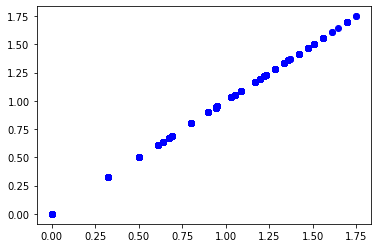

In [29]:
plt.plot(df_percep['ipv6.nxt'],df_percep['ipv6.nxt'], 'ro')
plt.plot(df_percep['ipv6.src'],df_percep['ipv6.src'], 'bo')

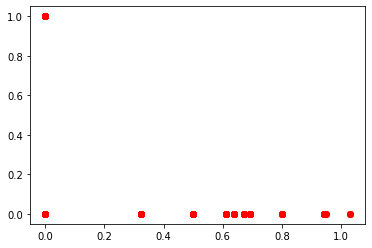

In [30]:
plt.plot(df_percep['ipv6.nxt'],df_percep['dos_bool'], 'ro')

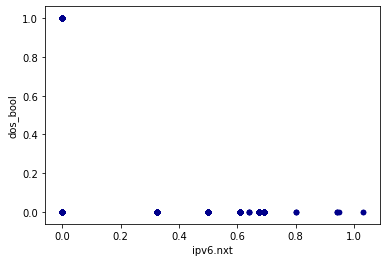

In [28]:
df_percep.plot.scatter(x='ipv6.nxt',

                      y='dos_bool',

                      c='DarkBlue')

In [8]:
df_percep['ipv6.nxt'].value_counts()

0.000000    100560
0.500402       334
0.325083       333
0.610864       158
0.673012       114
0.693147        45
0.639032         6
0.943348         5
0.801819         5
1.029653         3
0.950271         2
Name: ipv6.nxt, dtype: int64

In [27]:
test = df_percep['ipv6.nxt'] == 0
test.value_counts()

True     100560
False      1005
Name: ipv6.nxt, dtype: int64

In [30]:
test = df_percep['tcp.srcport'] == 0
test.value_counts()

False    95577
True      5988
Name: tcp.srcport, dtype: int64

In [50]:
data = list(zip(list(df_percep['ipv6.nxt']),list(df_percep['dos_bool'])))
random.shuffle(data)
dat1 = data[:8000]
dat2 = data[8000:]

In [58]:
tr_inp, tr_out = list(zip(*dat1))
tt_inp, tt_out = list(zip(*dat2))

In [61]:
list(tr_inp)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3250829733914482,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [47]:
df_percep['dos_bool'].value_counts()

0    80152
1    21413
Name: dos_bool, dtype: int64

In [62]:
pp = Perceptron()
pp.fit(np.array([list(tr_inp)]),np.array(list(tr_out)))

In [68]:
pp.predict(np.array(list(tt_inp)))

ValueError: shapes (93565,) and (8000,) not aligned: 93565 (dim 0) != 8000 (dim 0)